<a href="https://colab.research.google.com/github/SamuelRoblesArce/SurvivalCurveAttrition/blob/main/SurvivalCurveAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ae626b599bbab54d5675c6b8627a7cae838768c12234efcff18735bc03fc5377
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
datos= pd.read_csv("/content/drive/MyDrive/Modulo4/Employee_Attrition.csv")
datos.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Data Exploration

In [ ]:
datos.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
datos.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Diccionario para almacenar la conversión de tipos de datos
conversion_dict = {}

# Iterar sobre las columnas del DataFrame
for col in datos.columns:
    # Verificar si la columna es de tipo object
    if datos[col].dtype == 'object':
        # Obtener los valores únicos de la columna
        unique_values = datos[col].unique()

        # Crear un mapeo de valores únicos a números
        mapping = {value: i for i, value in enumerate(unique_values)}

        # Convertir la columna a numérica usando el mapeo
        datos[col] = datos[col].map(mapping)

        # Guardar la conversión en el diccionario
        conversion_dict[col] = mapping

In [ ]:
conversion_dict

{'Attrition': {'Yes': 0, 'No': 1},
 'BusinessTravel': {'Travel_Rarely': 0,
  'Travel_Frequently': 1,
  'Non-Travel': 2},
 'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},
 'EducationField': {'Life Sciences': 0,
  'Other': 1,
  'Medical': 2,
  'Marketing': 3,
  'Technical Degree': 4,
  'Human Resources': 5},
 'Gender': {'Female': 0, 'Male': 1},
 'JobRole': {'Sales Executive': 0,
  'Research Scientist': 1,
  'Laboratory Technician': 2,
  'Manufacturing Director': 3,
  'Healthcare Representative': 4,
  'Manager': 5,
  'Sales Representative': 6,
  'Research Director': 7,
  'Human Resources': 8},
 'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
 'Over18': {'Y': 0},
 'OverTime': {'Yes': 0, 'No': 1}}

In [ ]:
datos.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,1,1,1005,1,2,2,0,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,1,0,1324,1,3,3,2,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,1,0,1358,1,24,1,0,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,1,1,216,1,23,3,0,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,1,0,1299,1,27,3,2,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
datos.corr(numeric_only=True)['Attrition']

,Attrition
Age,0.159205
Attrition,1.000000
BusinessTravel,0.000074
DailyRate,0.056652
Department,0.063991
DistanceFromHome,-0.077924
Education,0.031373
EducationField,-0.075437
EmployeeCount,NaN
EmployeeNumber,0.010577


In [ ]:
# Identify columns with NaN correlation values
corr_matrix = datos.corr(numeric_only=True)
nan_corr_cols = corr_matrix.columns[corr_matrix['Attrition'].isnull()]

# Drop columns with NaN correlation to 'Attrition'
datos = datos.drop(columns=nan_corr_cols)

# Now you can proceed with your analysis using the updated dataframe 'datos'
# For example, recalculate the correlation matrix:
datos.corr(numeric_only=True)['Attrition']

,Attrition
Age,0.159205
Attrition,1.000000
BusinessTravel,0.000074
DailyRate,0.056652
Department,0.063991
DistanceFromHome,-0.077924
Education,0.031373
EducationField,-0.075437
EmployeeNumber,0.010577
EnvironmentSatisfaction,0.103369


Variables más relevantes:

In [ ]:
datos.corr(numeric_only=True)['Attrition'].abs().sort_values(ascending=False).head(6)

,Attrition
Attrition,1.000000
OverTime,0.246118
TotalWorkingYears,0.171063
JobLevel,0.169105
MaritalStatus,0.162070
YearsInCurrentRole,0.160545


<Axes: ylabel='Frequency'>

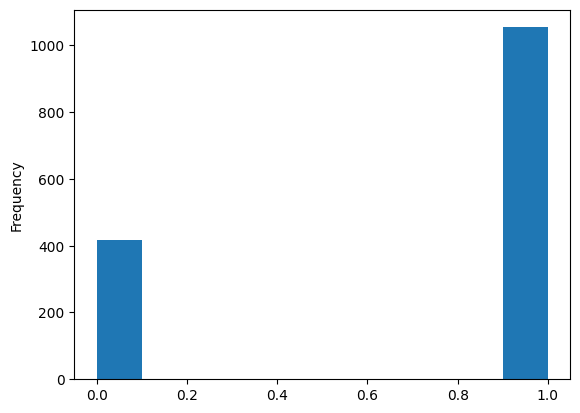

In [ ]:
datos['OverTime'].plot.hist()

<Axes: ylabel='Frequency'>

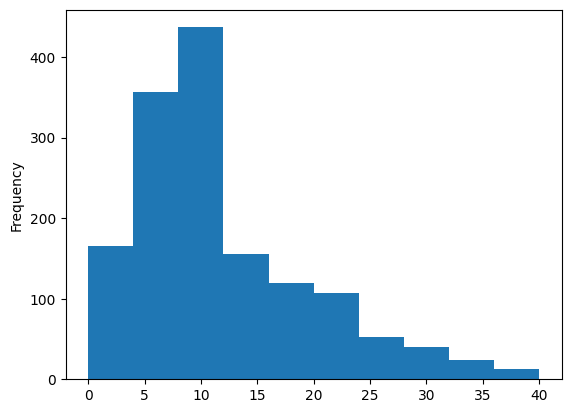

In [ ]:
datos['TotalWorkingYears'].plot.hist()

<Axes: ylabel='Frequency'>

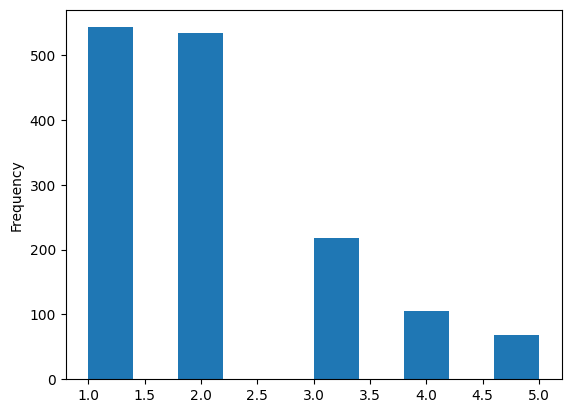

In [ ]:
#JobLevel
datos['JobLevel'].plot.hist()

<Axes: ylabel='Frequency'>

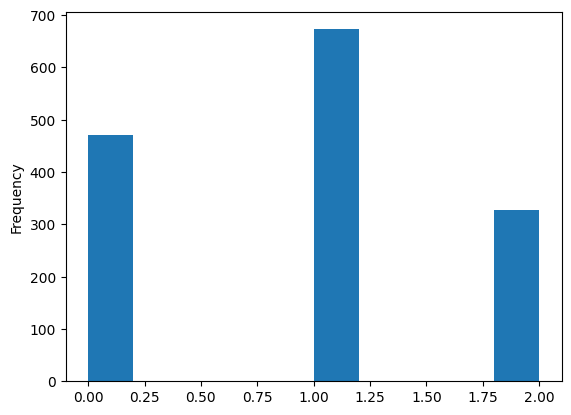

In [ ]:
#MaritalStatus
datos['MaritalStatus'].plot.hist()

<Axes: ylabel='Frequency'>

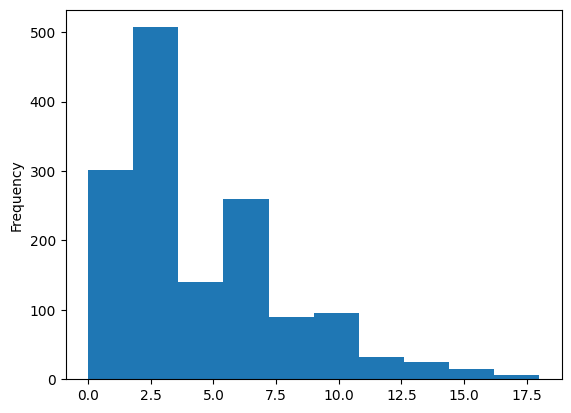

In [ ]:
#YearsInCurrentRole
datos['YearsInCurrentRole'].plot.hist()

# Survival Curve

Text(0.5, 1.0, 'Survival Curve')

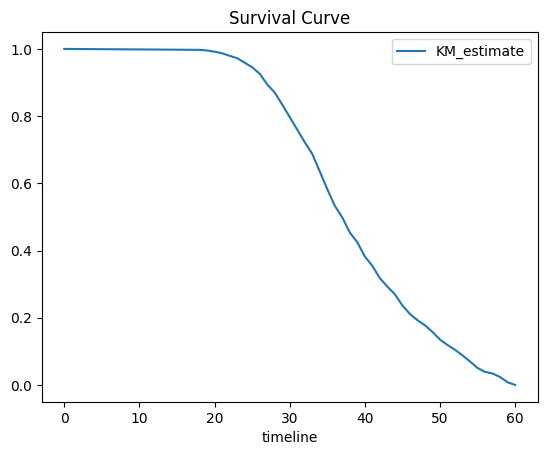

In [ ]:
kmf = lifelines.KaplanMeierFitter()

T = datos.Age
E = datos.Attrition
kmf.fit(T, E)
kmf.survival_function_.plot()
plt.title('Survival Curve')

<Axes: xlabel='timeline'>

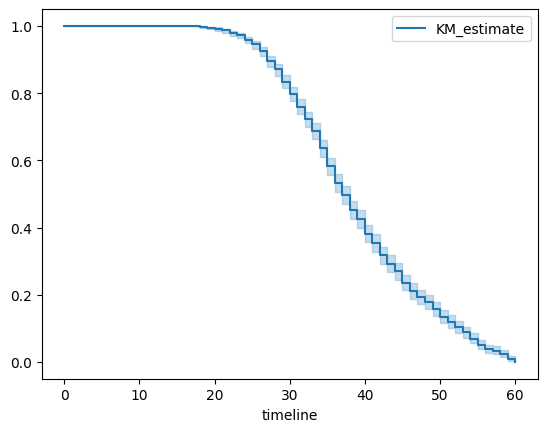

In [ ]:
kmf.plot()

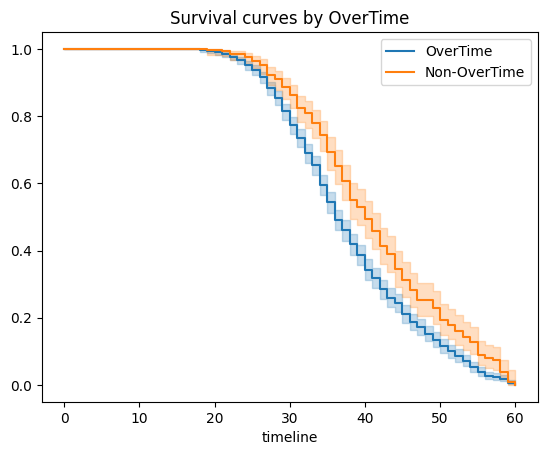

In [ ]:
# H0: S1(t)=S2(t)
# Ha: S1(t)<>S2(t)

ax = plt.subplot(111)

opc = (datos["OverTime"] == 1)

kmf.fit(T[opc], event_observed=E[opc], label="OverTime")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~opc], event_observed=E[~opc], label="Non-OverTime")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by OverTime");

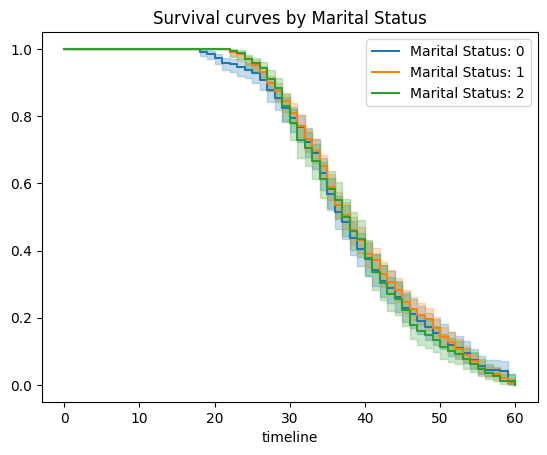

In [ ]:
ax = plt.subplot(111)

for status in datos['MaritalStatus'].unique():
    opc = (datos["MaritalStatus"] == status)
    kmf.fit(T[opc], event_observed=E[opc], label=f"Marital Status: {status}")
    kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by Marital Status");

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cph = CoxPHFitter()
cph.fit(datos, duration_col='Age', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 237 right-censored observations>

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 237 right-censored observations>
             duration col = 'Age'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 1233
   partial log-likelihood = -7445.77
         time fit was run = 2024-11-11 00:46:05 UTC

---
                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                 
BusinessTravel            0.03      1.03      0.04           -0.05            0.12                0.95                1.12
DailyRate                 0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Department                0.01      1.01      0.07           -0.13            0.14                0.88                1.15
DistanceFromHome         -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
Education                -0.12      0.89      0.03           -0.17           -0.06                0.84                0.94
EducationField           -0.02      0.98      0.02           -0.06            0.02                0.94                1.02
EmployeeNumber            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
EnvironmentSatisfaction   0.06      1.06      0.03            0.01            0.11                1.01                1.12
Gender                   -0.04      0.96      0.06           -0.15            0.08                0.86                1.08
HourlyRate               -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
JobInvolvement            0.02      1.02      0.04           -0.06            0.11                0.94                1.11
JobLevel                 -0.08      0.93      0.09           -0.25            0.09                0.78                1.10
JobRole                   0.00      1.00      0.02           -0.03            0.04                0.97                1.04
JobSatisfaction           0.01      1.01      0.03           -0.05            0.06                0.95                1.06
MaritalStatus            -0.05      0.95      0.05           -0.16            0.06                0.85                1.06
MonthlyIncome             0.00      1.00      0.00            0.00            0.00                1.00                1.00
MonthlyRate              -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
NumCompaniesWorked       -0.08      0.92      0.01           -0.11           -0.06                0.90                0.94
OverTime                  0.37      1.45      0.07            0.24            0.51                1.27                1.67
PercentSalaryHike        -0.03      0.97      0.01           -0.05           -0.00                0.95                1.00
PerformanceRating         0.14      1.15      0.13           -0.11            0.39                0.90                1.47
RelationshipSatisfaction -0.00      1.00      0.03           -0.06            0.05                0.94                1.05
StockOptionLevel          0.08      1.08      0.05           -0.01            0.17                0.99                1.18
TotalWorkingYears        -0.09      0.91      0.01           -0.11           -0.08                0.90                0.93
TrainingTimesLastYear    -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
WorkLifeBalance           0.06      1.06      0.04           -0.02            0.14                0.98                1.15
YearsAtCompany            0.01      1.01      0.01           -0.01            0.03                0.99                1.03
YearsInCurrentRole        0.02      1.02      0.01           -0.01   

<Axes: xlabel='log(HR) (95% CI)'>

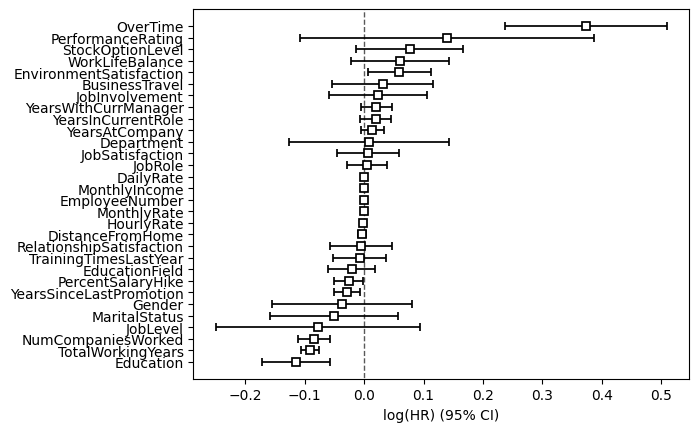

In [ ]:
cph.plot()

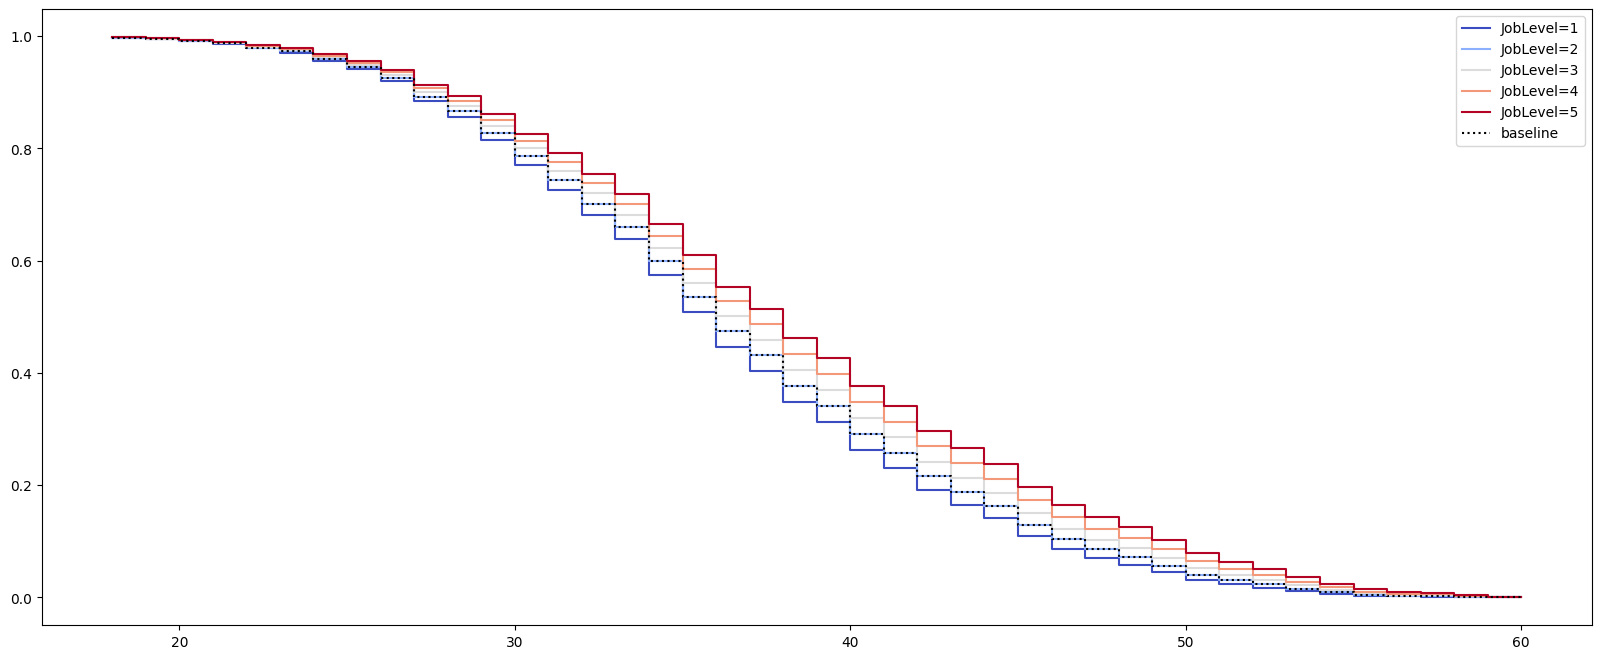

In [ ]:
cph.plot_partial_effects_on_outcome(covariates='JobLevel', values=[1, 2, 3, 4, 5], cmap='coolwarm',figsize=(20,8))
plt.show()

In [ ]:
data_sample=datos.sample(6,random_state=123)

In [ ]:
data_sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
42,26,0,0,1357,1,25,3,0,55,1,...,3,3,0,1,2,2,1,0,0,1
76,35,1,0,776,0,1,4,3,100,3,...,3,2,0,16,2,3,15,13,2,8
1380,35,1,0,682,0,18,4,2,1945,2,...,3,4,1,6,2,1,5,3,0,4
252,29,1,0,665,1,15,3,0,346,3,...,3,1,0,6,1,3,6,5,1,5
388,42,1,0,201,1,1,4,0,517,2,...,3,2,1,8,5,3,5,2,1,2
1206,26,1,2,786,1,7,3,2,1693,4,...,4,3,0,7,5,3,7,7,5,7


[]

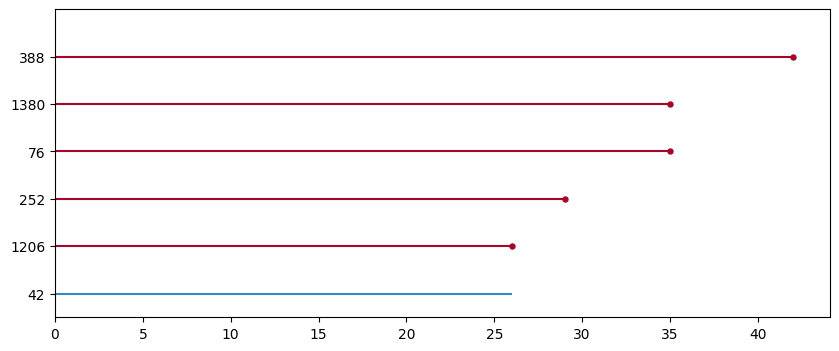

In [ ]:
plt.figure(figsize=(10,4))
time = data_sample.Age
event = data_sample.Attrition
lifelines.plotting.plot_lifetimes(durations=time, event_observed=event)
plt.plot()

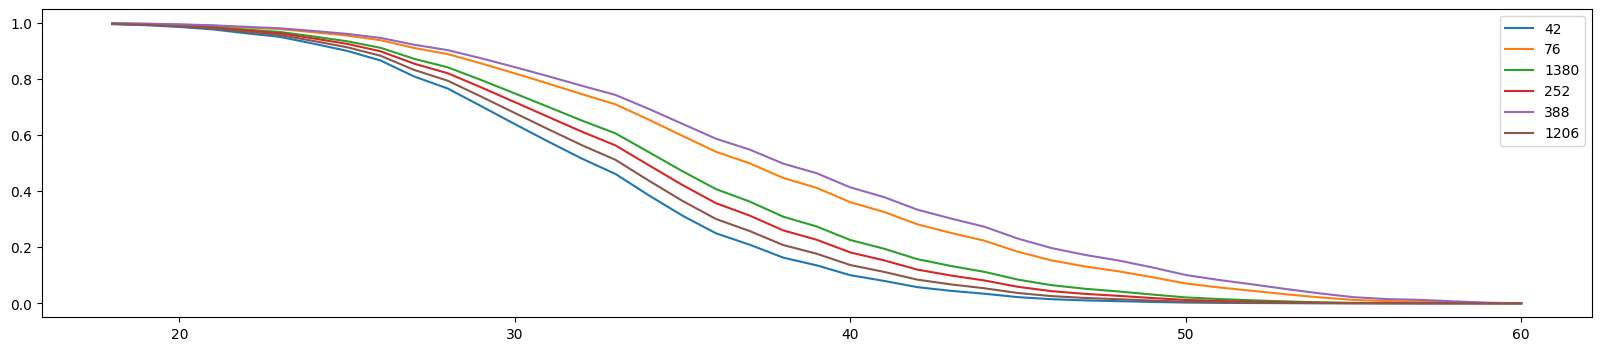

In [ ]:
plt.figure(figsize=(20,4))
surv_func = cph.predict_survival_function(data_sample)
exp_lifetime = cph.predict_expectation(data_sample)
plt.plot(surv_func)
plt.legend(surv_func.columns)
plt.show()

A pesar de que el individuo 42 tiene la curva de supervivencia más baja, es el único que no esta en Attrition.